__Subject:__      Infering City Population Size from City Data

__Date:__         07/20/2018

__Author:__         Edmund D. Chitwood

***

__Notebook Summary:__<br> 
<br>The following Notebook 
-  loads data from a byte stream,
-  and visualizes features and targets on a map of the world.

***

In [1]:
import pandas as pd
import pickle
import folium

In [2]:
all_cities = pd.read_pickle('Data/all_cities_clean.pkl')

In [3]:
all_cities.head()

Annual Precipitation Inches        Area  Average High Temp  \
0                    39.920000   14.610000          64.000000   
2                    23.626000   54.000000          52.000000   
4                    37.627009   28.000000          71.937604   
6                    37.627009  166.400000          71.937604   
7                    12.378000  942.897766          45.000000   

   Average Low Temp   City Name    Elevation  Latitude  Longitude  Population  \
0         53.200000    A Coruña   190.000000  43.36500   -8.41000    246056.0   
2         39.600000     Aalborg    16.000000  57.05000    9.91700    112194.0   
4         53.611716         Aba   673.000000   5.11700    7.36700    534265.0   
6         53.611716  Abaetetuba   138.000000  -1.71778  -48.88278    141054.0   
7         25.000000      Abakan  1320.820849  53.71700   91.46700    165214.0   

                                           URL  
0  https://en.wikipedia.org/wiki/A_Coru%C3%B1a  
2        https://en.wikipedia.org/wiki/Aalborg  
4   https://en.wikipedia.org/wiki/Aba,_Nigeria  
6     https://en.wikipedia.org/wiki/Abaetetuba  
7         https://en.wikipedia.org/wiki/Abakan

In [4]:
all_cities.shape

(2417, 10)

In [5]:
all_cities.describe()

Annual Precipitation Inches           Area  Average High Temp  \
count                  2417.000000    2417.000000        2417.000000   
mean                     37.627009     942.897766          71.937604   
std                      20.527783    4064.647732          10.687103   
min                       0.039000       1.250000          20.800000   
25%                      26.429000      39.960000          67.600000   
50%                      37.627009     124.000000          71.937604   
75%                      37.627009     942.897766          76.300000   
max                     179.310000  101913.000000         100.600000   

       Average Low Temp     Elevation     Latitude    Longitude    Population  
count       2417.000000   2417.000000  2417.000000  2417.000000  2.417000e+03  
mean          53.611716   1320.820849    25.990911    32.136633  8.997984e+05  
std           10.287104   1555.437982    22.452739    76.754231  1.899126e+06  
min           11.000000      0.000000   -53.167000  -157.817000  1.000720e+05  
25%           48.900000    269.000000    14.550000   -34.977780  1.673000e+05  
50%           53.611716   1320.820849    32.525000    35.866670  2.875700e+05  
75%           56.500000   1320.820849    41.133000   104.033000  6.633420e+05  
max           86.000000  14500.000000    69.333000   176.167000  3.016550e+07

In [7]:
# Display markers for all cities included in the analysis on a map of the world.
cities_map = folium.Map(location=[12.5, 5],zoom_start=2,tiles="OpenStreetMap",)

all_cities.apply(lambda row:folium.CircleMarker(location=[row['Latitude'], 
                                                          row['Longitude']],
                                                radius=1.5,)
                                             .add_to(cities_map), axis=1)

In [8]:
cities_map

In [ ]:
# inserting image of above folium map below
# folium map wasn't rendering in GitHub repo

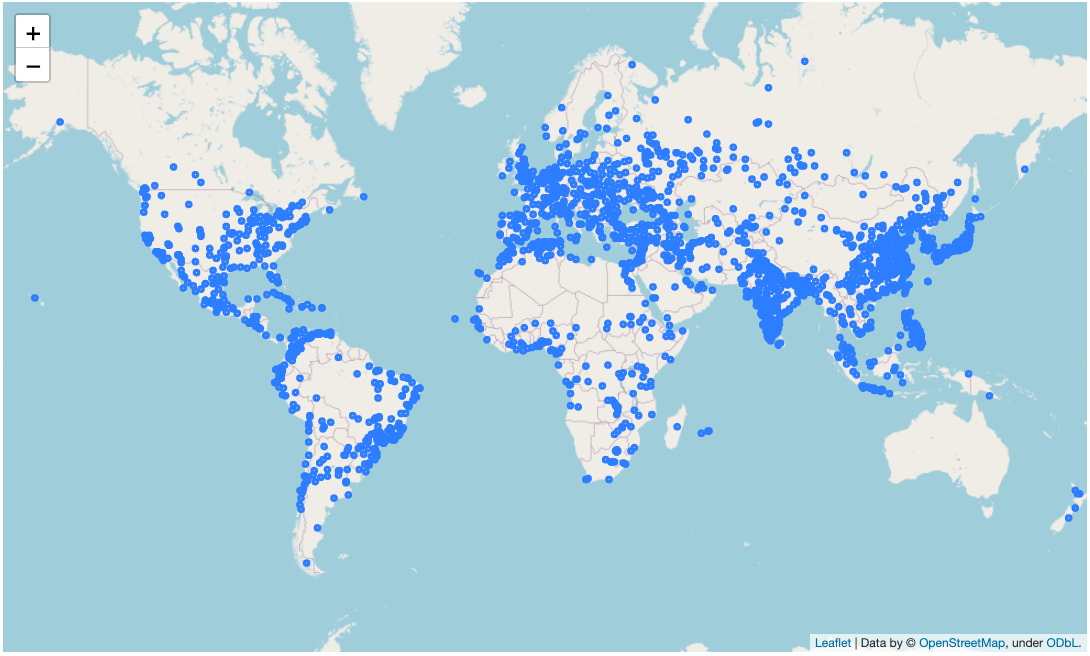

In [10]:
# Display markers for all cities included in the analysis on a map of the 
# world.
# Orange markers indicate the largest citites by area.
# Largest citites by area include cities with an area of 942 sq mi or more
# - 25% of cities included in analysis.

cities_map_area = folium.Map(location=[12.5, 5], zoom_start=2, 
                             tiles="OpenStreetMap")

all_cities.apply(lambda row:folium.CircleMarker(location=[row['Latitude'], 
                                                          row['Longitude']],
                                                radius=1.5,
                                                color=["#E37222" if row['Area'] 
                                                       > 942 else "#0A8A9F"])
                 .add_to(cities_map_area), axis=1)

#Red Cities are the largest in terms of area

In [11]:
cities_map_area

In [ ]:
# inserting image of above folium map below
# folium map wasn't rendering in GitHub repo

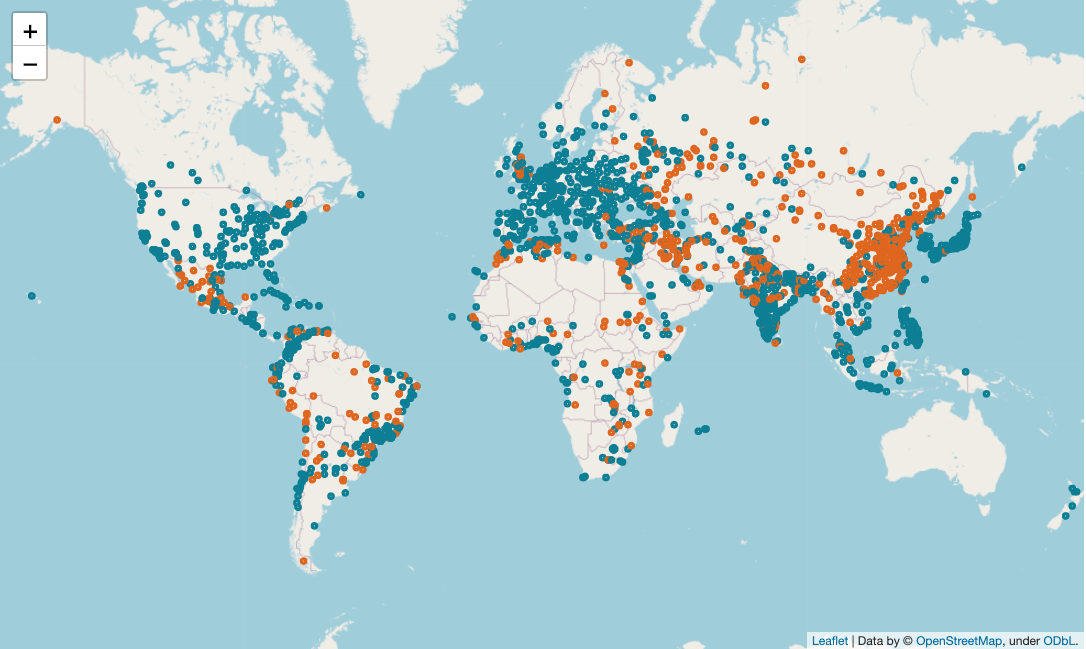

In [12]:
# Display markers for all cities included in the analysis on a map of 
# the world.
# Orange markers indicate the largest citites by population.
# Largest citites by population include cities with an population of 
# 663,342 or more - 25% of cities included in analysis.

cities_map_population = folium.Map(location=[12.5, 5], zoom_start=2, 
                                   tiles="OpenStreetMap")

all_cities.apply(lambda row:folium.CircleMarker(location=[row['Latitude'], 
                                                          row['Longitude']],
                                              radius=1.5,
                                              color=["#E37222" if 
                                                     row['Population'] > 663342 
                                                     else "#0A8A9F"])
                                             .add_to(cities_map_population), axis=1)


#Red Cities are the largest in terms of population

In [13]:
cities_map_population

In [ ]:
# inserting image of above folium map below
# folium map wasn't rendering in GitHub repo

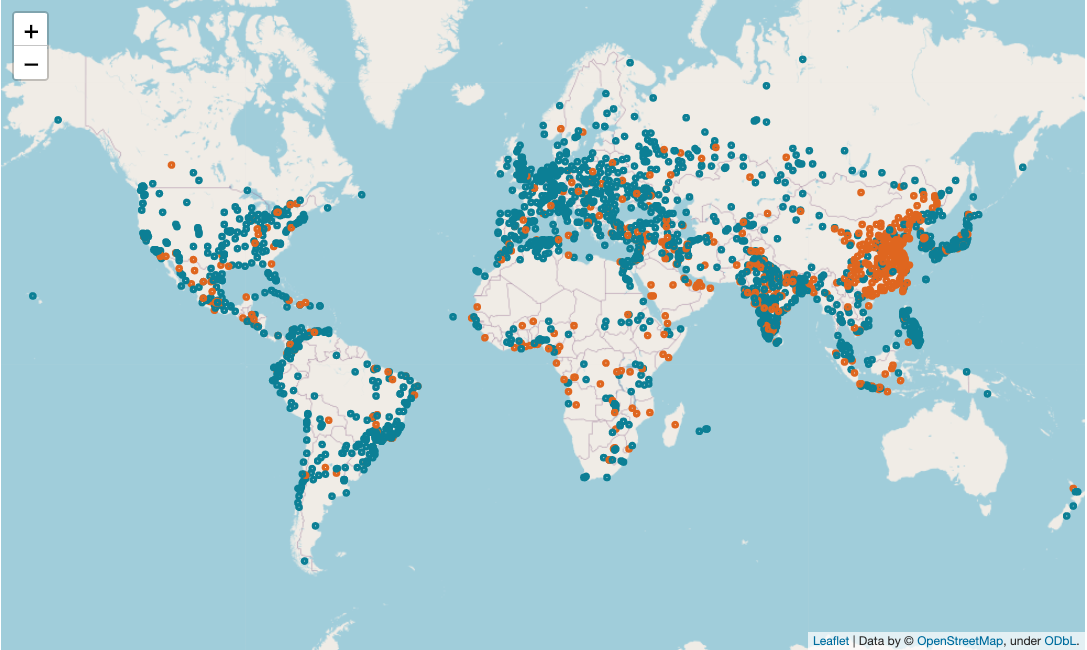

__Observations of the above maps:__<br> 
-  The area and aopulation maps are very similar, which is further evidence of the positive corelation between area and population.
-  Mapping each city by area and population shows the geographic concentrations of cities with the largest areas and populations (e.g. the cities in China are expecially large and populous.) 